In [35]:
# testing script for ScoreNet score calculations
import cv2
from PIL import Image, ImageOps
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
import cmasher as cmr # https://cmasher.readthedocs.io/
from scorenet import ScoreNet32, ScoreNet64

Now lets take some scores of a few test images

In [36]:
# Define image size 32 for low res of 64 for high
im_size = 64

# Select correct scorenet model
if im_size == 64:
    ScoreNet = ScoreNet64
else:
    ScoreNet = ScoreNet32

# define simpe function to normalise array
def norm_array(array):
    norm_array = (array-np.min(array))/(np.max(array)-np.min(array))
    return norm_array

# Load some data with a ring artifact around a galaxy
file_path = 'images/HSC_res64_artifact2.jpg'
image_1 = Image.open(file_path)
image_1 = np.array( ImageOps.grayscale(image_1) )
# resize to correct dimensions
image_1 = cv2.resize(image_1, dsize=(im_size, im_size), interpolation=cv2.INTER_CUBIC)
# add n_images dimension
ring_artifact = jnp.expand_dims( jnp.array(image_1), axis=0 )
# normalise output
ring_artifact = norm_array(ring_artifact)

size score is (1, 64, 64)


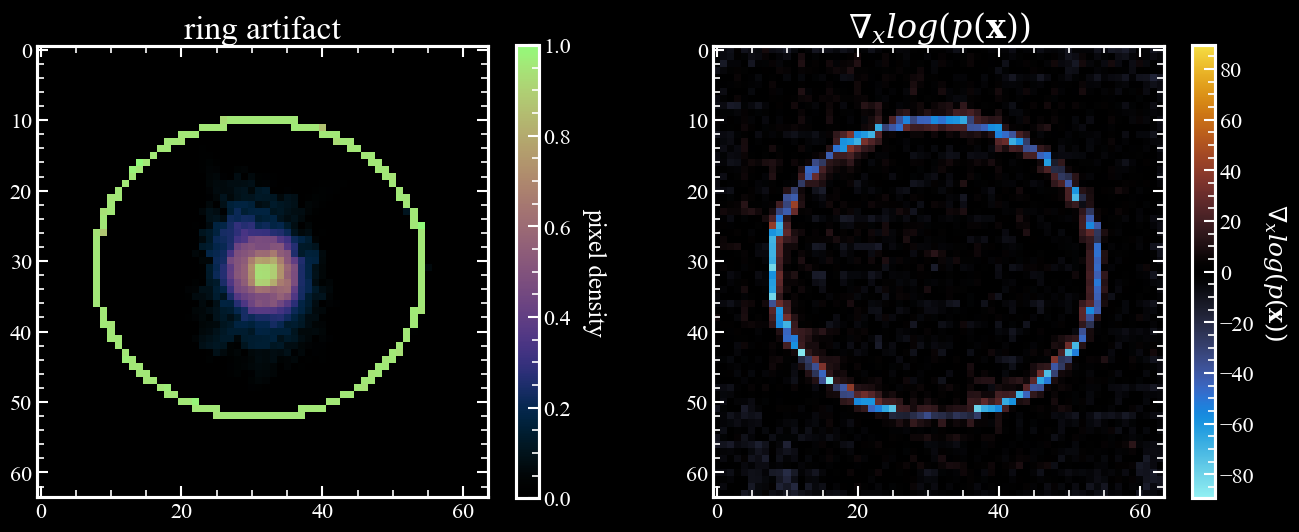

In [40]:
y = ring_artifact
score = ScoreNet(y)
print(f'size score is {score.shape}')
# score should be a (1, im_size, im_size) size array
# calculate max abs score values for better plotting (ie score 0 is center of cbar)
score_max = np.max(np.abs(score))

# now we can plot the raw image and the score calculated by the model
fig = plt.figure(figsize=(16, 6), dpi = 100)
plt.style.use('dark_background')

# the galaxy plus ring artifact
plt.subplot(1,2,1)
ring_im = plt.imshow(ring_artifact[0], cmap = cmr.lilac)
plt.title('ring artifact', fontsize = 24)
cbar = fig.colorbar(ring_im)
cbar.set_label(r'pixel density', rotation=270, fontsize = 18,labelpad= 25) 

# and the score
plt.subplot(1,2,2)
score_im = plt.imshow(score[0], cmap = cmr.iceburn, 
                    vmin = -score_max, vmax = score_max) # enforce symmetric cbar
score_eqn = r'$\nabla_x log(p(\mathbf{x}))$'
plt.title(score_eqn, fontsize = 24)
cbar = fig.colorbar(score_im)
cbar.set_label(score_eqn, rotation=270, fontsize = 18,labelpad= 25) 
plt.show()